# Problem Statement

Write a python program that finds a way to walk from a given point (to be announced in assessment) to the red dot at the lower left corner of the maze below (use “import matplotlib.pyplot as plt” for plotting).

The maze can be read out from attached maze.txt (use eval(‘True’) to convert).

In [ ]:
import numpy as np # array to be input into plot
import matplotlib.pyplot as plt # plot the array

In [2]:
# Functions to display the Maze
def showMaze(mazeGrid):
    ''' Display the maze corresponding to a grid
        Input : 2D NumPy array with 0 and 2 as elements
        Output : Heatmap grid of the corresponding maze
    '''
    (height, width) = mazeGrid.shape # mazeGrid.shape returns (row,column)    
    plt.figure(figsize=(5,5)) #Hi prof, changed this to 5 inches by 5 inches during presentation because it was too big on screen
                              #replace with (width,height) if need the maze to be big
    plt.imshow(mazeGrid, vmin = 0, vmax=2, cmap="Greys") # 2 is wall, 0 is path


def showProblem(mazeGrid, start, goal):
    ''' Display the maze corresponding to a grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 2 as elements
        Input : 2D coordinate of the "start" and "goal" has the value of 1
        Output : Heatmap grid of the maze with markers
    '''    
    (height, width) = mazeGrid.shape 
    mazeGrid[start[0],start[1]] = 1
    mazeGrid[goal[0], goal[1]] = 1
    plt.figure(figsize=(5,5))
    plt.imshow(mazeGrid, vmin = 0, vmax=2, cmap="Greys")
    

Maze of dimensions (51, 51)


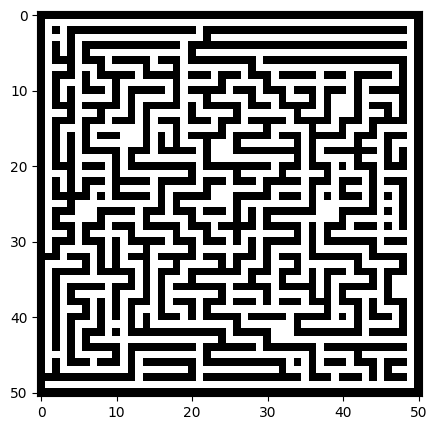

In [3]:
# Create the Maze
# 0 : empty cell, reachable within a path
# 2 : blocked cell or wall, not reachable
rawmaze = open("./maze.txt","r") #put in the file directory of maze.txt
lines = rawmaze.readlines()
s=[] #the converted values from the maze.txt file
twoD_list=[] #is the 51x51 list that is arranged from s list

for line in lines:
    if eval(line) == True: #eval used to represent a string into code
        s.append(2) #if the line in the txt doc is True, then it adds 2 into list
    else:
        s.append(0) #if line in txt doc is False, then it adds 0 into list      
# print(s) #debugging
# #now work on sorting out the s list into a 51x51
# #loop to add 51 elements of s into 1 element of twoD_list
n=0
while (n<51*51): #maze is 51x51
    twoD_list.append(s[n:n+51])
    n+=51
# print(twoD_list) #debugging

# # Convert to a NumPy array
mazeArray = np.array(twoD_list).T #need to transpose because first element in twoD_list(51 numbers) represents a column
# print(mazeArray) #debugging

# Print the maze using functions
print("Maze of dimensions", mazeArray.shape)
showMaze(mazeArray)

Starting point: (17, 48) Ending Point: (47, 1)


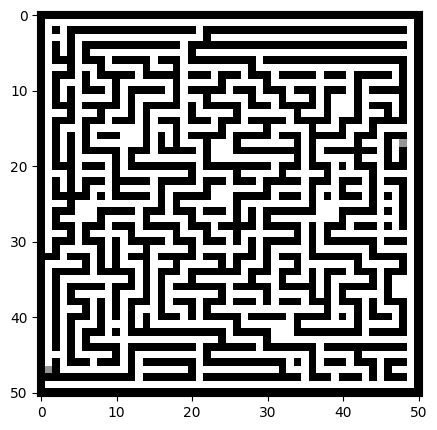

In [4]:
#Input start and end values here in the form of (row,column)
START = (17,48) #start[0]=? start[1]=? assume to be (1,1)
GOAL = (47, 1) #goal[0]=47 goal[1]=1
# Show the maze with start and end point using showProblem function
# print(mazeArray) #debugging

print("Starting point:", START, "Ending Point:", GOAL)
showProblem(mazeArray, START, GOAL)
mazeArray = np.array(twoD_list).T #to return mazeArray to its original code, ensures that there is only 1 starting point

In [5]:
# Function to convert a maze to a graph - a Graph has nodes and edges
def maze_to_graph(mazeGrid):
    ''' Converts a 2D maze to corresponding graph
        Input : 2D NumPy array with 0, 1 and 2 as elements
        Output : MazeGraph corresponding to input maze
    '''
    mazeGraph = dict()
    (height, width) = mazeGrid.shape
    
    #mazeGrid[row,column]
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes since the cells that are filled is 2, 
            # the rest is either 0 or 1(start and end)
            if mazeGrid[i,j] != 2: #check if value in array is 2, if it is then ignore
                
                neighbours = []
                
                # Adjacent cell : Top
                if  mazeGrid[i-1,j] != 2:
                    neighbours.append((i-1,j))
                    
                # Adjacent cell : Left                
                if mazeGrid[i,j-1] != 2:
                    neighbours.append((i,j-1))
                    
                # Adjacent cell : Bottom                    
                if mazeGrid[i+1,j] != 2:
                    neighbours.append((i+1,j))

                # Adjacent cell : Right                    
                if mazeGrid[i,j+1] != 2:
                    neighbours.append((i,j+1))
              
                # Insert values into the dictionary(mazeGraph)
                if len(neighbours) > 0:
                    mazeGraph[(i,j)] = neighbours 
                    #key is coordinates (i,j), value is a list of coordinates of neighbours

    return mazeGraph

#both mazegraph and parent are dictionaries

#in mazegraph the parent node is key and all its neighbour nodes is the value

#in parent, the new node is the key, the value is where it came from(the parent node)
#so there is 1 key and 1 value in parent dictionary
#parent dictionary shows you the parent(value) of the current node(key) you are in


In [6]:
# Convert the maze to a graph
# input is mazeGrid => mazeArray
mazegraph = maze_to_graph(mazeArray)

# Prints the dictionary key(parentnode) and value(neighbours)
mazegraph #debugging

{(1, 1): [(2, 1), (1, 2)],
 (1, 2): [(1, 1), (1, 3)],
 (1, 3): [(1, 2), (2, 3), (1, 4)],
 (1, 4): [(1, 3), (1, 5)],
 (1, 5): [(1, 4), (1, 6)],
 (1, 6): [(1, 5), (1, 7)],
 (1, 7): [(1, 6), (1, 8)],
 (1, 8): [(1, 7), (1, 9)],
 (1, 9): [(1, 8), (1, 10)],
 (1, 10): [(1, 9), (1, 11)],
 (1, 11): [(1, 10), (1, 12)],
 (1, 12): [(1, 11), (1, 13)],
 (1, 13): [(1, 12), (1, 14)],
 (1, 14): [(1, 13), (1, 15)],
 (1, 15): [(1, 14), (1, 16)],
 (1, 16): [(1, 15), (1, 17)],
 (1, 17): [(1, 16), (1, 18)],
 (1, 18): [(1, 17), (1, 19)],
 (1, 19): [(1, 18), (1, 20)],
 (1, 20): [(1, 19), (1, 21)],
 (1, 21): [(1, 20), (2, 21), (1, 22)],
 (1, 22): [(1, 21), (1, 23)],
 (1, 23): [(1, 22), (1, 24)],
 (1, 24): [(1, 23), (1, 25)],
 (1, 25): [(1, 24), (1, 26)],
 (1, 26): [(1, 25), (1, 27)],
 (1, 27): [(1, 26), (1, 28)],
 (1, 28): [(1, 27), (1, 29)],
 (1, 29): [(1, 28), (1, 30)],
 (1, 30): [(1, 29), (1, 31)],
 (1, 31): [(1, 30), (1, 32)],
 (1, 32): [(1, 31), (1, 33)],
 (1, 33): [(1, 32), (1, 34)],
 (1, 34): [(1, 33), 

In [7]:
# Breadth-First-Search (BFS) with FIFO Queue

def breadth_first_search(mazeGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = []    # FIFO Queue for frontier in the form of list
    
    frontier.append(start)    # Add the start node to end of frontier list
    parent = {}               # Dict of explored nodes {explorednode : parentNode} => dictionary used to find the parent of the explored node)
    parent[start] = None      # start node has no parent node
    
    while True: #infinite loop until break statement
        # get next node from frontier
        currentNode = frontier.pop(0) #.pop(0) method takes the first element and deletes it 
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbour of current node (takes the values that is assigned to the key=>currentNode)
        for nextNode in mazeGraph[currentNode]:
            # ignore the value if it has already been explored (if it is inside the dictionary called parent)
            if nextNode not in parent:
                
                # put new node into back of list
                frontier.append(nextNode)
                
                # assign current node as parent
                parent[nextNode] = currentNode
    
    return parent


# Reconstruct the path from the Dict of explored nodes {(node) : (parentNode)}
# Backtrack from the goal node by checking successive parents

def reconstruct_path(parent, start, goal):
    currentNode = goal             # start at the goal node
    path = []                    # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = parent[currentNode] #explored[currentNode] is the parent of the current node

    path.append(start)   # append start node for completeness since the while loop won't add in the start (row,column)
    path.reverse()       # reverse the path from start to goal

    return path


# Function to display the Maze with Path

def showMazePath(mazeGrid, path):
    ''' Display the maze corresponding to a grid
        Add path into the grid 
        Input : 2D NumPy array with 0 and 2 as elements
        Input : 2D coordinates of the paths on the maze => value of path, start and end is 1
        Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape

    for node in path: 
        mazeGrid[node] = 1     # half level of grayscale (0 to 2) to highlight the path
    plt.figure(figsize=(5,5))
    plt.imshow(mazeGrid, vmin = 0, vmax=2, cmap="Greys")
    
    

Breadth-First-Search (BFS)

Path through the Maze : [(17, 48), (17, 49), (18, 49), (19, 49), (20, 49), (21, 49), (22, 49), (23, 49), (24, 49), (25, 49), (26, 49), (27, 49), (28, 49), (29, 49), (30, 49), (31, 49), (32, 49), (33, 49), (34, 49), (35, 49), (36, 49), (37, 49), (38, 49), (39, 49), (40, 49), (41, 49), (42, 49), (43, 49), (44, 49), (45, 49), (45, 48), (45, 47), (45, 46), (45, 45), (46, 45), (47, 45), (48, 45), (49, 45), (49, 44), (49, 43), (49, 42), (49, 41), (49, 40), (49, 39), (49, 38), (49, 37), (49, 36), (49, 35), (49, 34), (49, 33), (49, 32), (49, 31), (49, 30), (49, 29), (49, 28), (49, 27), (49, 26), (49, 25), (49, 24), (49, 23), (49, 22), (49, 21), (48, 21), (47, 21), (46, 21), (45, 21), (44, 21), (43, 21), (43, 20), (43, 19), (43, 18), (43, 17), (43, 16), (43, 15), (43, 14), (43, 13), (43, 12), (43, 11), (44, 11), (45, 11), (46, 11), (47, 11), (47, 10), (47, 9), (47, 8), (47, 7), (47, 6), (47, 5), (47, 4), (47, 3), (46, 3), (45, 3), (45, 2), (45, 1), (46, 1), (47, 1)]


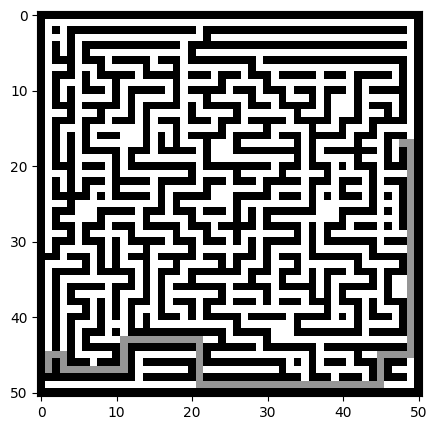

In [8]:
# Run the BFS algorithm for path finding

#Unrefined answer to the maze
nodesExplored = breadth_first_search(mazegraph, START, GOAL)

# print(nodesExplored) #debugging

#turns into refined answer of the maze
path = reconstruct_path(nodesExplored, START, GOAL) 
#contains the values for row&column of the shortest path from goal to start

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print() #prints new line


# Print the path and show using showMazePath function
print("Path through the Maze :", path) #path is the refined answer to the maze in form of code/text
showMazePath(mazeArray,path) #visualize the path
mazeArray = np.array(twoD_list).T